In [1]:
import numpy as np
from SALib.sample import fast_sampler
from SALib.analyze import sobol
from SALib.analyze import fast
import matplotlib.pyplot as plt
from SALib import ProblemSpec
from SALib.sample import saltelli

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Pacejka52 as pa52
import Pacejka52_Sv_Sh_0 as pa52_0
import Pacejka52_params_comp as pa52pa

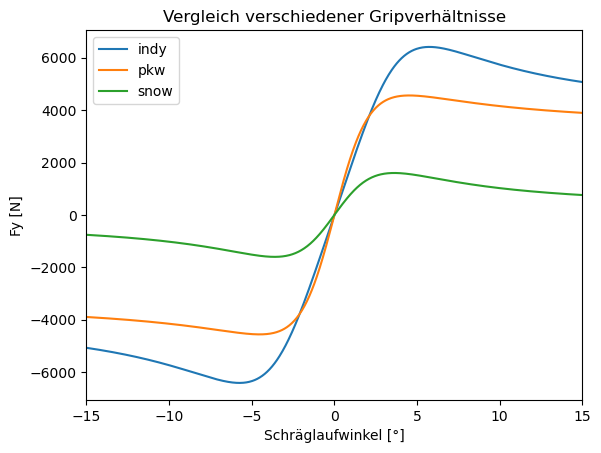

In [3]:
#
#Vergleich verschiedener Reifen, Schne, Eis, Normal pkw, rennreifen
#
# Gießler, Martin, Mechanismen der Kraftübertragung des Reifens auf Schnee und Eis
#
# lateral

params_indy =  [-9.10763555,  1.5991035,  -1.60244708 ,-1.89562919]
params_pkw = [-11.39821059 ,  2.32399442 , -1.13947082,   0.99851018]
params_snow = [9, 3, 0.4, 1]
i = 1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)
Sy_plt = np.linspace(-15,15,i)
Fz = 4000
IA = 0
Fz0 = 3114

Fy_indy = pa52.Pacejka5_long_pa(Sy,Fz,*params_indy)
Fy_pkw = pa52.Pacejka5_long_pa(Sy,Fz,*params_pkw)
Fy_snow = pa52.Pacejka5_long_pa(Sy,Fz,*params_snow)
plt.figure(1)

plt.plot(Sy_plt,Fy_indy, label =  'indy')
plt.plot(Sy_plt,Fy_pkw, label = 'pkw')
plt.plot(Sy_plt,Fy_snow, label =  'snow')
plt.xlim(-15,15)
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')
plt.title('Vergleich verschiedener Gripverhältnisse')
plt.legend()

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()
C:\Users\bener\AppData\Local\Temp\ipykernel_40764\2569801789.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
C:\Users\bener\AppData\Local\Temp\ipykernel_40764\2569801789.py:143: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)


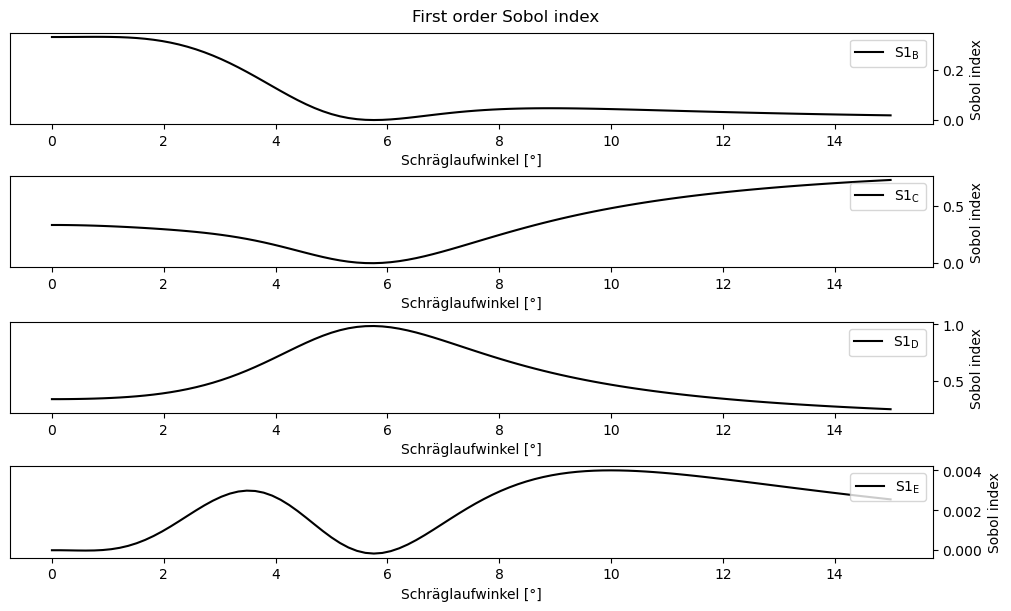

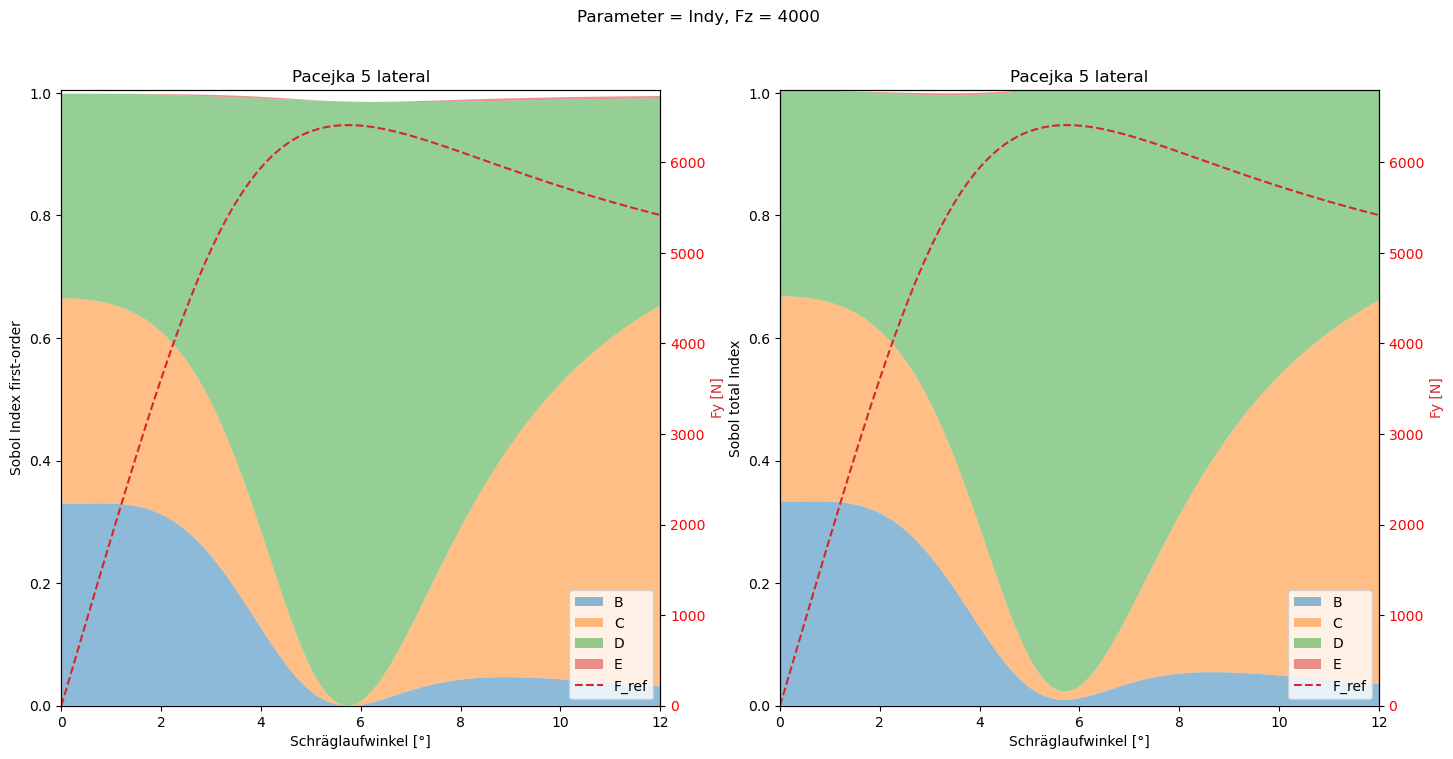

In [4]:
######
# gloabel SA mit Sobol  Indy
######

#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
SY = np.linspace(0,0.3,100)
SY_plt = np.linspace(0,15,100)
#function

F_ref = pa52.Pacejka5_lat_pa(SY,Fz,*params_indy)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))

for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max
s=0.1
# [-9.10763555,  1.5991035,  -1.60244708 ,-1.89562919]
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-9.10763555 * (1+s),-9.10763555 * (1-s)], [1.5991035* (1-s), 1.5991035* (1+s)], 
            [-1.60244708* (1+s), -1.60244708* (1-s)], [-1.89562919* (1+s), -1.89562919* (1-s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = pa52.Pacejka5_lat_pa(SY,Fz,B,C,D,E)

    return y


itera = 8

(
sp.sample_sobol(2**itera) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)
fig.suptitle('First order Sobol index')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    S1s[0, i] = S1s[1, i]
    ax.plot(SY_plt, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("Schräglaufwinkel [°]")
    ax.set_ylabel("Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
fig.suptitle('Parameter = Indy, Fz = 4000')

S1s_B  = np.array(S1s[:,0])
S1s_B[0] = S1s_B[1]
S1s_C  = np.array(S1s[:,1])
S1s_C[0] = S1s_C[1]
S1s_D  = np.array(S1s[:,2])
S1s_D[0] = S1s_D[1]
S1s_E  = np.array(S1s[:,3])
S1s_E[0] = S1s_E[1]

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

ax1.fill_between(SY_plt, S1s_B, 0, alpha=0.5, label='B')
ax1.fill_between(SY_plt, S1s_B, S1s_C_plt, where=(S1s_C_plt > S1s_B), alpha=0.5, label='C')
ax1.fill_between(SY_plt, S1s_C_plt, S1s_D_plt, where=(S1s_D_plt > S1s_C_plt), alpha=0.5, label='D')
ax1.fill_between(SY_plt, S1s_D_plt, S1s_E_plt, where=(S1s_E_plt > S1s_D_plt), alpha=0.5, label='E')
#ax1.plot(SL, F_ref_plt, 'r--', label='Fx_ref')
ax1.set_xlabel('Schräglaufwinkel [°]')
ax1.set_ylabel('Sobol Index first-order')
ax1.set_title('Pacejka 5 lateral')
ax1.set_xlim(0,12)
ax1.set_ylim(0,1.005)

color = 'tab:red'
ax3 = ax1.twinx()
ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax3.set_ylim(0,6800)
ax3.set_ylabel('Fy [N]', color = color)
ax3.tick_params(axis='y', labelcolor='red')

ln1, lab1 = ax1.get_legend_handles_labels()
ln3, lab3 = ax3.get_legend_handles_labels()
lns = ln1 + ln3
labs = lab1 + lab3
ax1.legend(lns, labs, loc='lower right')

STs_B  = np.array(STs[:,0])
STs_B[0] = STs_B[1]
STs_C  = np.array(STs[:,1])
STs_C[0] = STs_C[1]
STs_D  = np.array(STs[:,2])
STs_D[0] = STs_D[1]
STs_E  = np.array(STs[:,3])
STs_E[0] = STs_E[1]

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

ax2.fill_between(SY_plt, STs_B, 0, alpha=0.5, label='B')
ax2.fill_between(SY_plt, STs_B, STs_C_plt, where=(STs_C_plt > STs_B), alpha=0.5, label='C')
ax2.fill_between(SY_plt, STs_C_plt, STs_D_plt, where=(STs_D_plt > STs_C_plt), alpha=0.5, label='D')
ax2.fill_between(SY_plt, STs_D_plt, STs_E_plt, where=(STs_E_plt > STs_D_plt), alpha=0.5, label='E')
ax2.set_xlabel('Schräglaufwinkel [°]')
ax2.set_ylabel('Sobol total Index')
ax2.set_title('Pacejka 5 lateral')
ax2.legend(loc='upper right')
ax2.set_xlim(0,12)
ax2.set_ylim(0,1.005)

ax4 = ax2.twinx()
ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax4.set_ylim(0,6800)
ax4.set_ylabel('Fy [N]', color = color)
ax4.tick_params(axis='y', labelcolor='red')

ln2, lab2 = ax1.get_legend_handles_labels()
ln4, lab4 = ax3.get_legend_handles_labels()
lns = ln2 + ln4
labs = lab2 + lab4
ax2.legend(lns, labs, loc='lower right')

C:\Users\bener\AppData\Local\Temp\ipykernel_9064\3255188392.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
C:\Users\bener\AppData\Local\Temp\ipykernel_9064\3255188392.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)


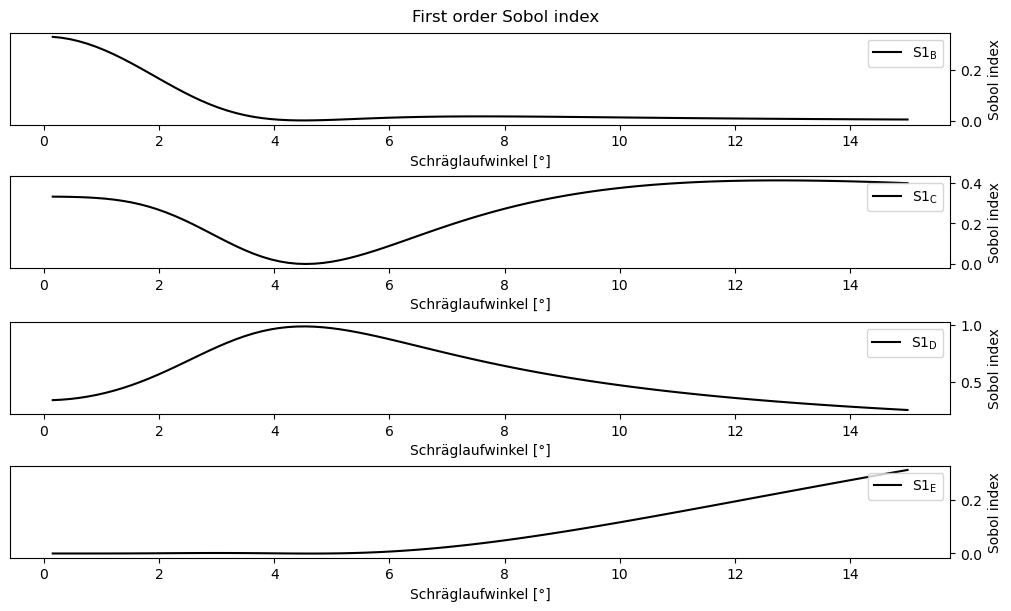

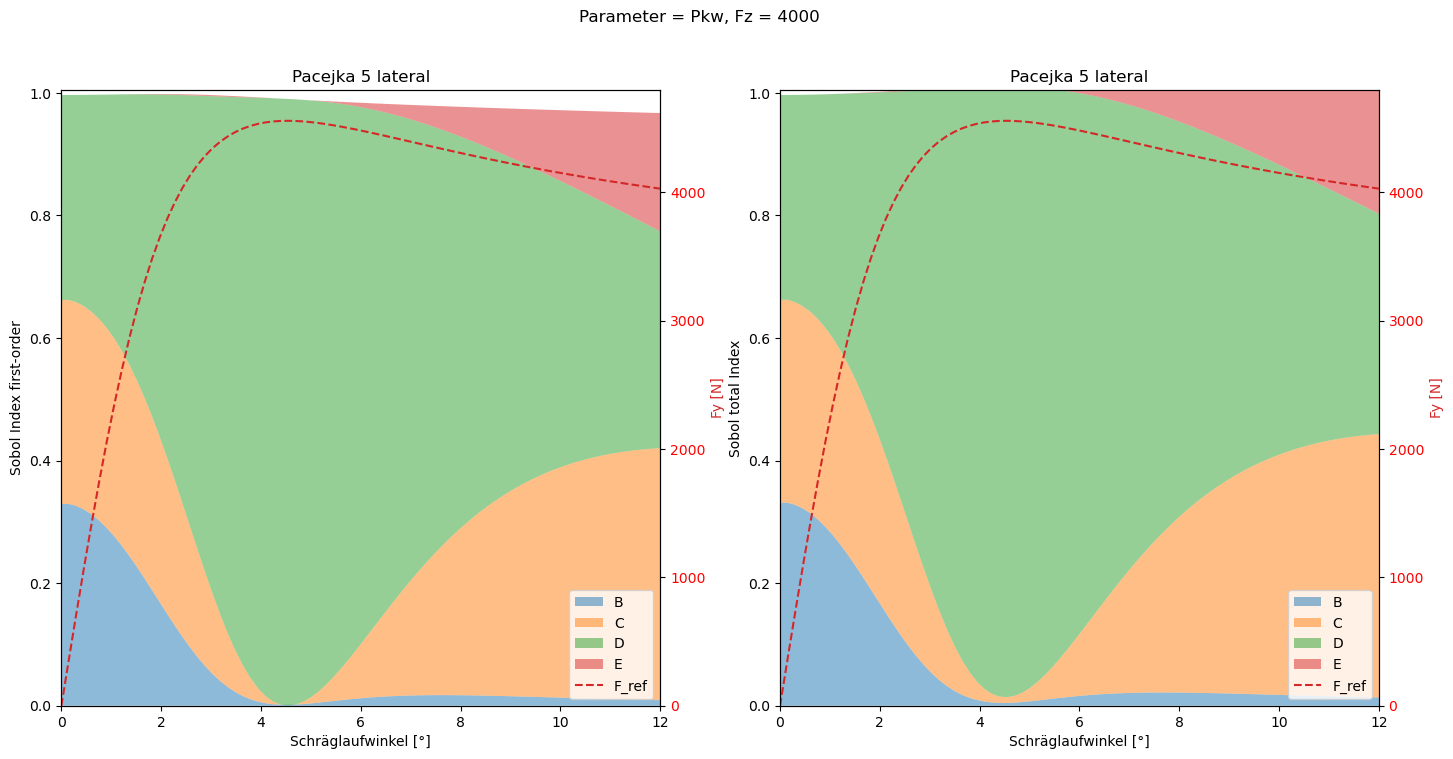

In [26]:
######
# gloabel SA mit Sobol  pkw
######

#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
SY = np.linspace(0,0.3,100)
SY_plt = np.linspace(0,15,100)
#function

F_ref = pa52.Pacejka5_lat_pa(SY,Fz,*params_pkw)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))

for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max
s=0.1
# [-11.39821059 ,  2.32399442 , -1.13947082,   0.99851018
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-11.39821059 * (1+s),-11.39821059 * (1-s)], [2.32399442* (1-s), 2.32399442* (1+s)], 
            [-1.13947082* (1+s), -1.13947082* (1-s)], [0.99851018* (1-s), 0.99851018* (1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = pa52.Pacejka5_lat_pa(SY,Fz,B,C,D,E)

    return y


itera = 8

(
sp.sample_sobol(2**itera) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)
fig.suptitle('First order Sobol index')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SY_plt, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("Schräglaufwinkel [°]")
    ax.set_ylabel("Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
fig.suptitle('Parameter = Pkw, Fz = 4000')

S1s_B  = np.array(S1s[:,0])
S1s_B[0] = S1s_B[1]
S1s_C  = np.array(S1s[:,1])
S1s_C[0] = S1s_C[1]
S1s_D  = np.array(S1s[:,2])
S1s_D[0] = S1s_D[1]
S1s_E  = np.array(S1s[:,3])
S1s_E[0] = S1s_E[1]

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

ax1.fill_between(SY_plt, S1s_B, 0, alpha=0.5, label='B')
ax1.fill_between(SY_plt, S1s_B, S1s_C_plt, where=(S1s_C_plt > S1s_B), alpha=0.5, label='C')
ax1.fill_between(SY_plt, S1s_C_plt, S1s_D_plt, where=(S1s_D_plt > S1s_C_plt), alpha=0.5, label='D')
ax1.fill_between(SY_plt, S1s_D_plt, S1s_E_plt, where=(S1s_E_plt > S1s_D_plt), alpha=0.5, label='E')
#ax1.plot(SL, F_ref_plt, 'r--', label='Fx_ref')
ax1.set_xlabel('Schräglaufwinkel [°]')
ax1.set_ylabel('Sobol Index first-order')
ax1.set_title('Pacejka 5 lateral')
ax1.set_xlim(0,12)
ax1.set_ylim(0,1.005)

color = 'tab:red'
ax3 = ax1.twinx()
ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax3.set_ylim(0,4800)
ax3.set_ylabel('Fy [N]', color = color)
ax3.tick_params(axis='y', labelcolor='red')

ln1, lab1 = ax1.get_legend_handles_labels()
ln3, lab3 = ax3.get_legend_handles_labels()
lns = ln1 + ln3
labs = lab1 + lab3
ax1.legend(lns, labs, loc='lower right')

STs_B  = np.array(STs[:,0])
STs_B[0] = STs_B[1]
STs_C  = np.array(STs[:,1])
STs_C[0] = STs_C[1]
STs_D  = np.array(STs[:,2])
STs_D[0] = STs_D[1]
STs_E  = np.array(STs[:,3])
STs_E[0] = STs_E[1]

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

ax2.fill_between(SY_plt, STs_B, 0, alpha=0.5, label='B')
ax2.fill_between(SY_plt, STs_B, STs_C_plt, where=(STs_C_plt > STs_B), alpha=0.5, label='C')
ax2.fill_between(SY_plt, STs_C_plt, STs_D_plt, where=(STs_D_plt > STs_C_plt), alpha=0.5, label='D')
ax2.fill_between(SY_plt, STs_D_plt, STs_E_plt, where=(STs_E_plt > STs_D_plt), alpha=0.5, label='E')
ax2.set_xlabel('Schräglaufwinkel [°]')
ax2.set_ylabel('Sobol total Index')
ax2.set_title('Pacejka 5 lateral')
ax2.legend(loc='upper right')
ax2.set_xlim(0,12)
ax2.set_ylim(0,1.005)

ax4 = ax2.twinx()
ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax4.set_ylim(0,4800)
ax4.set_ylabel('Fy [N]', color = color)
ax4.tick_params(axis='y', labelcolor='red')

ln2, lab2 = ax1.get_legend_handles_labels()
ln4, lab4 = ax3.get_legend_handles_labels()
lns = ln2 + ln4
labs = lab2 + lab4
ax2.legend(lns, labs, loc='lower right')

C:\Users\bener\AppData\Local\Temp\ipykernel_9064\3192448909.py:107: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
C:\Users\bener\AppData\Local\Temp\ipykernel_9064\3192448909.py:143: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)


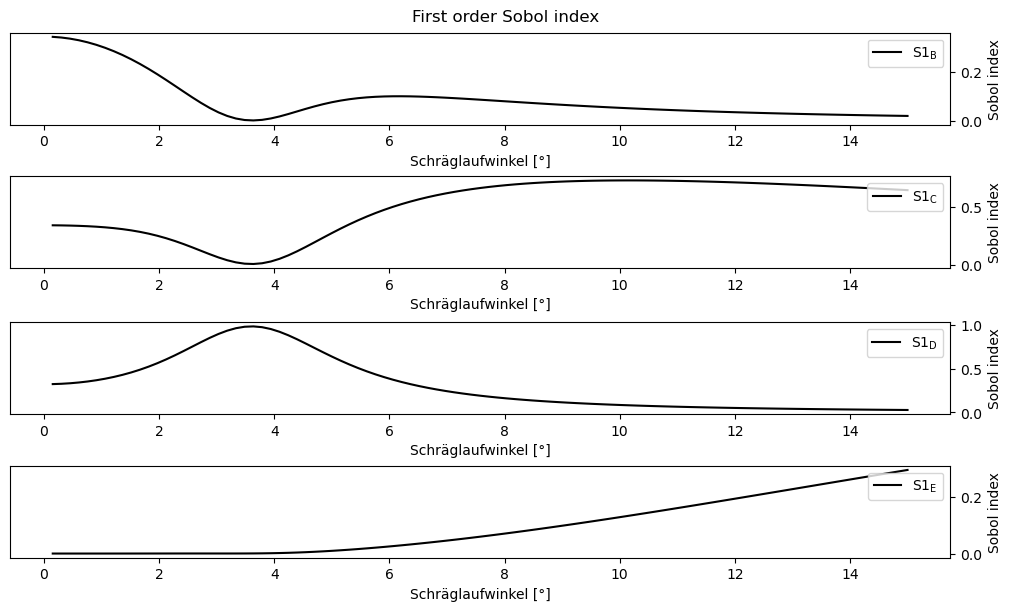

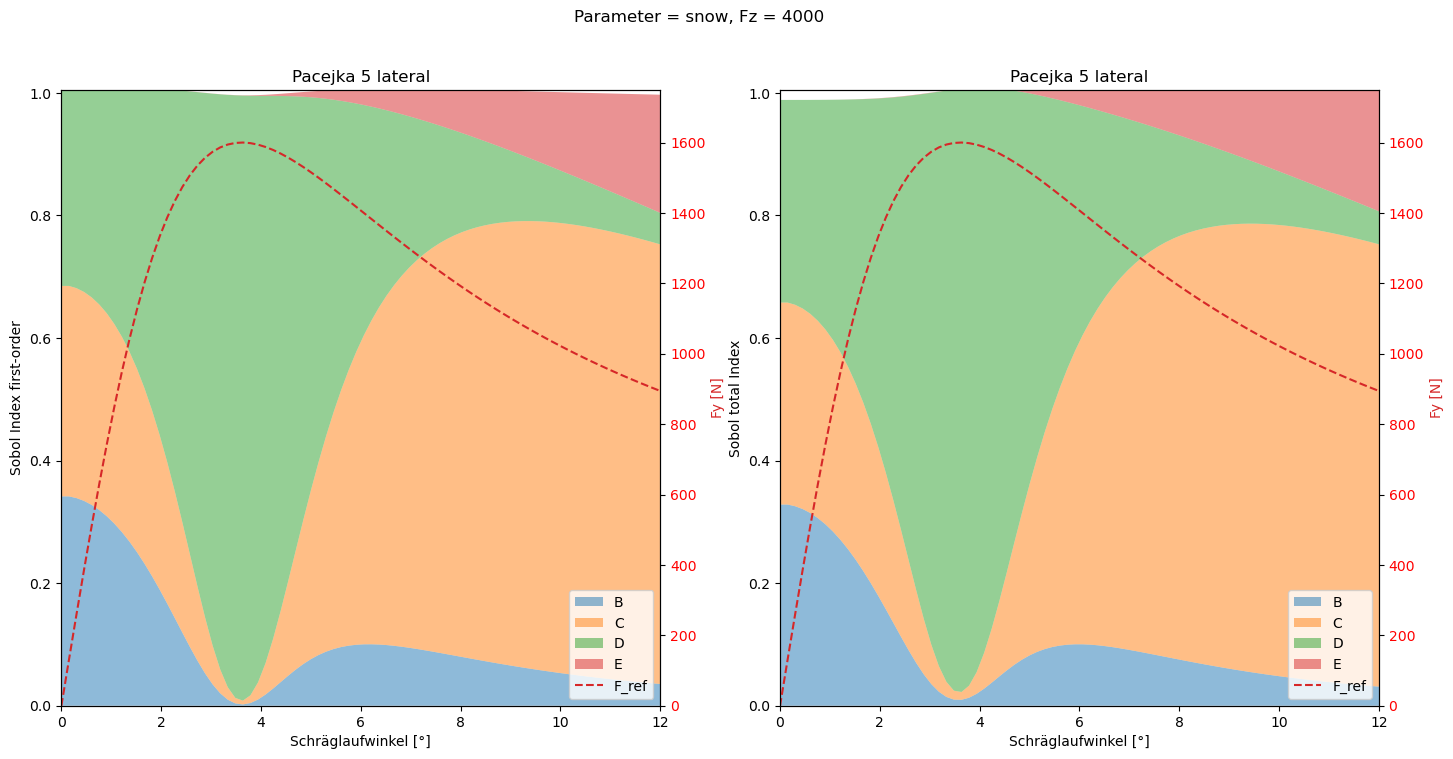

In [31]:
######
# gloabel SA mit Sobol  pkw
######

#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec
SY = np.linspace(0,0.3,100)
SY_plt = np.linspace(0,15,100)
#function

F_ref = pa52.Pacejka5_lat_pa(SY,Fz,*params_snow)
F_max = np.max(F_ref)
F_ref_plt = np.zeros(len(F_ref))

for i in range(0, len(F_ref)):
    F_ref_plt[i] = F_ref[i] / F_max
s=0.1
# [9, 3, 0.4, 1]
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[9 * (1-s),9 * (1+s)], [3* (1-s), 3* (1+s)], 
            [0.4* (1-s), 0.4* (1+s)], [1* (1-s), 1* (1+s)]],
})


# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SY=SY):
    y = np.zeros((ab.shape[0], SY.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = pa52.Pacejka5_lat_pa(SY,Fz,B,C,D,E)

    return y


itera = 8

(
sp.sample_sobol(2**itera) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)
fig.suptitle('First order Sobol index')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SY_plt, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("Schräglaufwinkel [°]")
    ax.set_ylabel("Sobol index")
    

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
fig.suptitle('Parameter = snow, Fz = 4000')

S1s_B  = np.array(S1s[:,0])
S1s_B[0] = S1s_B[1]
S1s_C  = np.array(S1s[:,1])
S1s_C[0] = S1s_C[1]
S1s_D  = np.array(S1s[:,2])
S1s_D[0] = S1s_D[1]
S1s_E  = np.array(S1s[:,3])
S1s_E[0] = S1s_E[1]

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

ax1.fill_between(SY_plt, S1s_B, 0, alpha=0.5, label='B')
ax1.fill_between(SY_plt, S1s_B, S1s_C_plt, where=(S1s_C_plt > S1s_B), alpha=0.5, label='C')
ax1.fill_between(SY_plt, S1s_C_plt, S1s_D_plt, where=(S1s_D_plt > S1s_C_plt), alpha=0.5, label='D')
ax1.fill_between(SY_plt, S1s_D_plt, S1s_E_plt, where=(S1s_E_plt > S1s_D_plt), alpha=0.5, label='E')
#ax1.plot(SL, F_ref_plt, 'r--', label='Fx_ref')
ax1.set_xlabel('Schräglaufwinkel [°]')
ax1.set_ylabel('Sobol Index first-order')
ax1.set_title('Pacejka 5 lateral')
ax1.set_xlim(0,12)
ax1.set_ylim(0,1.005)

color = 'tab:red'
ax3 = ax1.twinx()
ax3.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax3.set_ylim(0,1750)
ax3.set_ylabel('Fy [N]', color = color)
ax3.tick_params(axis='y', labelcolor='red')

ln1, lab1 = ax1.get_legend_handles_labels()
ln3, lab3 = ax3.get_legend_handles_labels()
lns = ln1 + ln3
labs = lab1 + lab3
ax1.legend(lns, labs, loc='lower right')

STs_B  = np.array(STs[:,0])
STs_B[0] = STs_B[1]
STs_C  = np.array(STs[:,1])
STs_C[0] = STs_C[1]
STs_D  = np.array(STs[:,2])
STs_D[0] = STs_D[1]
STs_E  = np.array(STs[:,3])
STs_E[0] = STs_E[1]

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

ax2.fill_between(SY_plt, STs_B, 0, alpha=0.5, label='B')
ax2.fill_between(SY_plt, STs_B, STs_C_plt, where=(STs_C_plt > STs_B), alpha=0.5, label='C')
ax2.fill_between(SY_plt, STs_C_plt, STs_D_plt, where=(STs_D_plt > STs_C_plt), alpha=0.5, label='D')
ax2.fill_between(SY_plt, STs_D_plt, STs_E_plt, where=(STs_E_plt > STs_D_plt), alpha=0.5, label='E')
ax2.set_xlabel('Schräglaufwinkel [°]')
ax2.set_ylabel('Sobol total Index')
ax2.set_title('Pacejka 5 lateral')
ax2.legend(loc='upper right')
ax2.set_xlim(0,12)
ax2.set_ylim(0,1.005)

ax4 = ax2.twinx()
ax4.plot(SY_plt,F_ref, 'r--', label='F_ref',color = color)
ax4.set_ylim(0,1750)
ax4.set_ylabel('Fy [N]', color = color)
ax4.tick_params(axis='y', labelcolor='red')

ln2, lab2 = ax1.get_legend_handles_labels()
ln4, lab4 = ax3.get_legend_handles_labels()
lns = ln2 + ln4
labs = lab2 + lab4
ax2.legend(lns, labs, loc='lower right')